### Sun and Moon angular separation 
For a period of 100 years, sample the position (lat, lon, for that epoch) of the sun and moon every N day where N = 100, 10, 1.  
Compute the angular separation of the sun and moon for each sample
Plot the results. 

|#|date|jd|sun_lat|sun_lon|moon_lat|moon_lon|moon_angsep|
|--|--|--|--|--|--|--|--|



In [94]:
import pandas as pd
import astropy.units as u
from astropy.time import Time
from astropy.coordinates import SkyCoord, EarthLocation, AltAz
from astropy.coordinates import get_sun, get_moon, get_body
from astropy.coordinates import Angle
from astropy.coordinates import ICRS, Galactic, FK4, FK5, GeocentricTrueEcliptic
from astropy.coordinates import Angle, Latitude, Longitude
import os
import re


The function `_calculate_sun_moon_angular_sep` is a helper function that calculates the angular separation between the Sun and the Moon over a specified period of time.

The function takes three parameters:

- `start_date`: The date from which to start the calculations.
- `N_YEARS`: The number of years over which to perform the calculations.
- `STEPS_OF_N_DAYS`: The step size, in days, for the calculations.

The function first gets the current time and initializes an empty list `acc`. It then calculates the total number of days in the specified number of years.

Next, it enters a loop that runs from 0 to the total number of days, in steps of `STEPS_OF_N_DAYS`. For each step, it calculates the positions of the Sun and the Moon at the current time, transforms these positions to the Geocentric True Ecliptic coordinate system, and calculates the angular separation between the Sun and the Moon. The results of these calculations are appended to the `acc` list.

The function also includes a progress report that prints the percentage of the total time period that has been processed, the number of samples collected, and the elapsed time since the start of the function.

Finally, after the loop, the function creates a pandas DataFrame from the `acc` list and returns it. The DataFrame contains columns for the time, Julian date, Sun's and Moon's ecliptic longitude and latitude, and the Sun-Moon separation.


The `calculate_sun_moon_angular_sep` function calculates the angular separation between the Sun and the Moon over a specified period of time. It takes three parameters:

- `start_date`: The start date of the time period. The default is '-02500-01-01' in UTC.
- `N_YEARS`: The number of years in the time period. The default is 100.
- `STEPS_OF_N_DAYS`: The number of days in each step of the time period. The default is 100.

The function first constructs a filename for a cached file that would contain the calculated angular separation values. The filename is based on the start date, the number of years, and the number of days in each step.

The function then tries to load the DataFrame from the cached file. If successful, it prints a message indicating that the DataFrame was loaded from the cached file and returns the DataFrame.

If the function fails to load the DataFrame from the cached file (for example, if the file does not exist), it prints a message indicating that it failed to load the DataFrame and is regenerating it. It then calls the `_calculate_sun_moon_angular_sep` function to calculate the angular separation values and saves the resulting DataFrame to the cached file. Finally, it returns the DataFrame.

The last line of the provided code calls the `calculate_sun_moon_angular_sep` function with `STEPS_OF_N_DAYS` set to 1. This means that the function will calculate the angular separation between the Sun and the Moon for every day over the default time period of 100 years, starting from the default start date of '-02500-01-01'.

In [87]:

def _calculate_sun_moon_angular_sep( start_date , N_YEARS , STEPS_OF_N_DAYS):
    now_ts = Time.now()
    acc = []
    n_days = int(N_YEARS*365.25)
    for i in range(0, n_days, STEPS_OF_N_DAYS):
        t = start_date + i*u.day
        sun, moon = get_body('Sun', t) , get_body('Moon', t)
        sun_ecliptic, moon_ecliptic = sun.transform_to(GeocentricTrueEcliptic) , moon.transform_to(GeocentricTrueEcliptic)
        sun_moon_sep = sun.separation(moon).to(u.deg)
        acc.append([ t, t.jd, sun_ecliptic.lon.deg, sun_ecliptic.lat.deg, moon_ecliptic.lon.deg, moon_ecliptic.lat.deg, sun_moon_sep.deg])
        sample_num = len(acc)

        # report periodically or at the end
        if (sample_num % (1000 if sample_num>1000 else 100) == 0) or ( i >= n_days -STEPS_OF_N_DAYS) :
            delta = (Time.now().jd - now_ts.jd)*24*3600
            pct = 100*i/36525
            print(f'{pct:4.0f}%, {sample_num:6d} samples, {float(str(delta)):6.2f} seconds ')

    df = pd.DataFrame(acc, columns=['time', 'jd', 'sun_lon', 'sun_lat', 'moon_lon', 'moon_lat', 'sun_moon_sep'])
    return df

def calculate_sun_moon_angular_sep(
        start_date = Time('-02500-01-01', scale='utc')
        , N_YEARS=100
        , STEPS_OF_N_DAYS=100
        ):
    """
    Calculate the angular separation between the Sun and the Moon for a given time period.
    
    Parameters:
    - start_date (Time): The start date of the time period. Default is '-02500-01-01' in UTC.
    - N_YEARS (int): The number of years in the time period. Default is 100.
    - STEPS_OF_N_DAYS (int): The number of days in each step of the time period. Default is 100.
    
    Returns:
    - df (DataFrame): A pandas DataFrame containing the calculated angular separation values.
    """
    cached_file = f'./__appcache__/sun_moon_angular_sep_{start_date.isot}_{N_YEARS}_{STEPS_OF_N_DAYS}.csv'
    try:
        df = pd.read_csv(cached_file)
        print(f'Loaded from {cached_file}')
        return df
    except:
        print(f'Failed to load from {cached_file}, regenerating ...')
        df = _calculate_sun_moon_angular_sep(start_date, N_YEARS, STEPS_OF_N_DAYS)
        os.makedirs(os.path.dirname(cached_file), exist_ok=True)
        df.to_csv(cached_file, index=False)
        pass


calculate_sun_moon_angular_sep(STEPS_OF_N_DAYS=1)



Loaded from ./__appcache__/sun_moon_angular_sep_-2500-01-01T00:00:00.000_100_1.csv


/Users/sunder/miniforge3/envs/tfmetal/lib/python3.9/site-packages/erfa/core.py:154: ErfaWarning: ERFA function "dtf2d" yielded 1 of "dubious year (Note 6)"
  warnings.warn('ERFA function "{}" yielded {}'.format(func_name, wmsg),
/Users/sunder/miniforge3/envs/tfmetal/lib/python3.9/site-packages/erfa/core.py:154: ErfaWarning: ERFA function "d2dtf" yielded 1 of "dubious year (Note 5)"
  warnings.warn('ERFA function "{}" yielded {}'.format(func_name, wmsg),


,time,jd,sun_lon,sun_lat,moon_lon,moon_lat,sun_moon_sep
0,-02500-01-01T00:00:00.000,807953.5,343.721810,-0.224941,178.898952,4.904621,164.136446
1,-02500-01-02T00:00:00.000,807954.5,344.716342,-0.214948,192.477322,4.992448,151.867739
2,-02500-01-03T00:00:00.000,807955.5,345.710294,-0.204904,206.242469,4.794469,139.259726
3,-02500-01-04T00:00:00.000,807956.5,346.703680,-0.194812,220.145201,4.312746,126.456235
4,-02500-01-05T00:00:00.000,807957.5,347.696512,-0.184674,234.141980,3.570098,113.518480
...,...,...,...,...,...,...,...
36520,-02401-12-28T00:00:00.000,844473.5,338.092529,-0.271593,70.815978,5.742369,92.736946
36521,-02401-12-29T00:00:00.000,844474.5,339.091011,-0.262214,84.303755,5.422501,105.168541
36522,-02401-12-30T00:00:00.000,844475.5,340.088812,-0.252769,97.470166,4.822588,117.299970
36523,-02401-12-31T00:00:00.000,844476.5,341.085939,-0.243260,110.346367,3.990437,129.168399


Loaded from ./__appcache__/sun_moon_angular_sep_-2500-01-01T00:00:00.000_100_100.csv


/Users/sunder/miniforge3/envs/tfmetal/lib/python3.9/site-packages/erfa/core.py:154: ErfaWarning: ERFA function "dtf2d" yielded 1 of "dubious year (Note 6)"
  warnings.warn('ERFA function "{}" yielded {}'.format(func_name, wmsg),
/Users/sunder/miniforge3/envs/tfmetal/lib/python3.9/site-packages/erfa/core.py:154: ErfaWarning: ERFA function "d2dtf" yielded 1 of "dubious year (Note 5)"
  warnings.warn('ERFA function "{}" yielded {}'.format(func_name, wmsg),


,time,jd,sun_lon,sun_lat,moon_lon,moon_lat,sun_moon_sep,date
0,-02500-01-01T00:00:00.000,807953.500000,343.721810,-0.224941,178.898952,4.904621,164.136446,-02500-01-01
1,-02500-04-11T00:00:00.000,808053.500000,80.533842,0.597296,64.726669,-2.476924,16.099373,-02500-04-11
2,-02500-07-20T00:00:00.000,808153.500000,176.696926,0.092606,299.148313,-2.550248,122.420145,-02500-07-20
3,-02500-10-28T00:00:00.000,808253.500000,277.703765,-0.614383,170.654274,5.374545,107.031429,-02500-10-28
4,-02499-02-05T00:00:00.000,808353.500000,17.927921,0.136457,60.236457,-1.483696,42.335061,-02499-02-05


Loaded from ./__appcache__/sun_moon_angular_sep_-2500-01-01T00:00:00.000_100_10.csv


,time,jd,sun_lon,sun_lat,moon_lon,moon_lat,sun_moon_sep,date
0,-02500-01-01T00:00:00.000,807953.500000,343.721810,-0.224941,178.898952,4.904621,164.136446,-02500-01-01
1,-02500-01-11T00:00:00.000,807963.500000,353.642149,-0.122972,318.697560,-3.162543,35.057649,-02500-01-11
2,-02500-01-21T00:00:00.000,807973.500000,3.503453,-0.017621,87.097615,-0.950669,83.594753,-02500-01-21
3,-02500-01-31T00:00:00.000,807983.500000,13.297626,0.087659,215.967628,4.338471,156.923033,-02500-01-31
4,-02500-02-10T00:00:00.000,807993.500000,23.034928,0.189399,355.822604,-4.891978,27.650891,-02500-02-10


Loaded from ./__appcache__/sun_moon_angular_sep_-2500-01-01T00:00:00.000_100_1.csv


,time,jd,sun_lon,sun_lat,moon_lon,moon_lat,sun_moon_sep,date
0,-02500-01-01T00:00:00.000,807953.500000,343.721810,-0.224941,178.898952,4.904621,164.136446,-02500-01-01
1,-02500-01-02T00:00:00.000,807954.500000,344.716342,-0.214948,192.477322,4.992448,151.867739,-02500-01-02
2,-02500-01-03T00:00:00.000,807955.500000,345.710294,-0.204904,206.242469,4.794469,139.259726,-02500-01-03
3,-02500-01-04T00:00:00.000,807956.500000,346.703680,-0.194812,220.145201,4.312746,126.456235,-02500-01-04
4,-02500-01-05T00:00:00.000,807957.500000,347.696512,-0.184674,234.141980,3.570098,113.518480,-02500-01-05


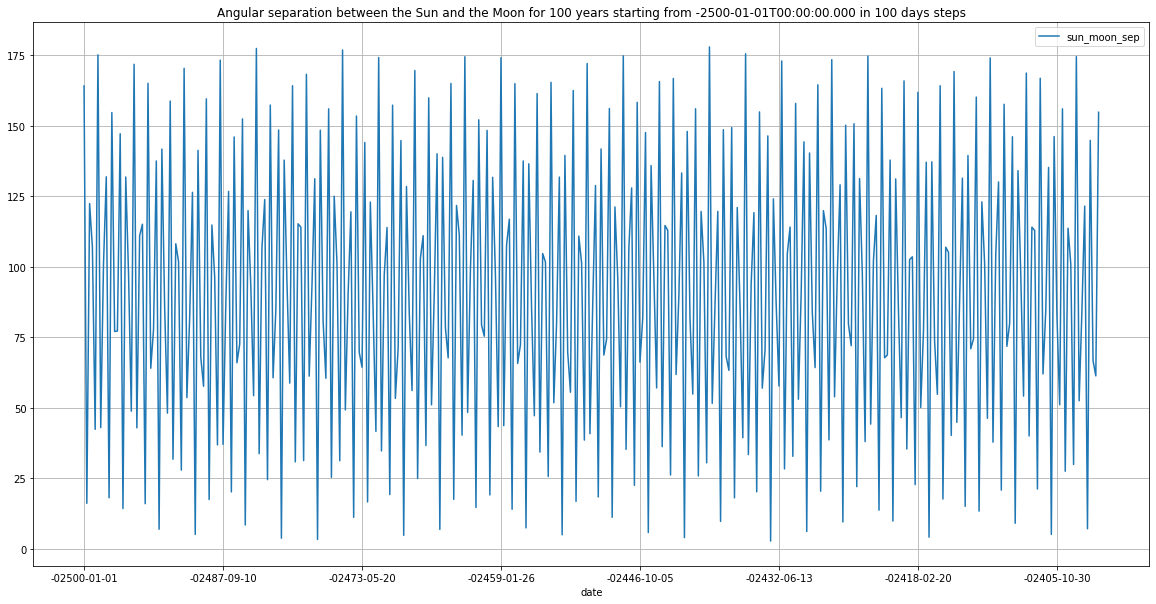

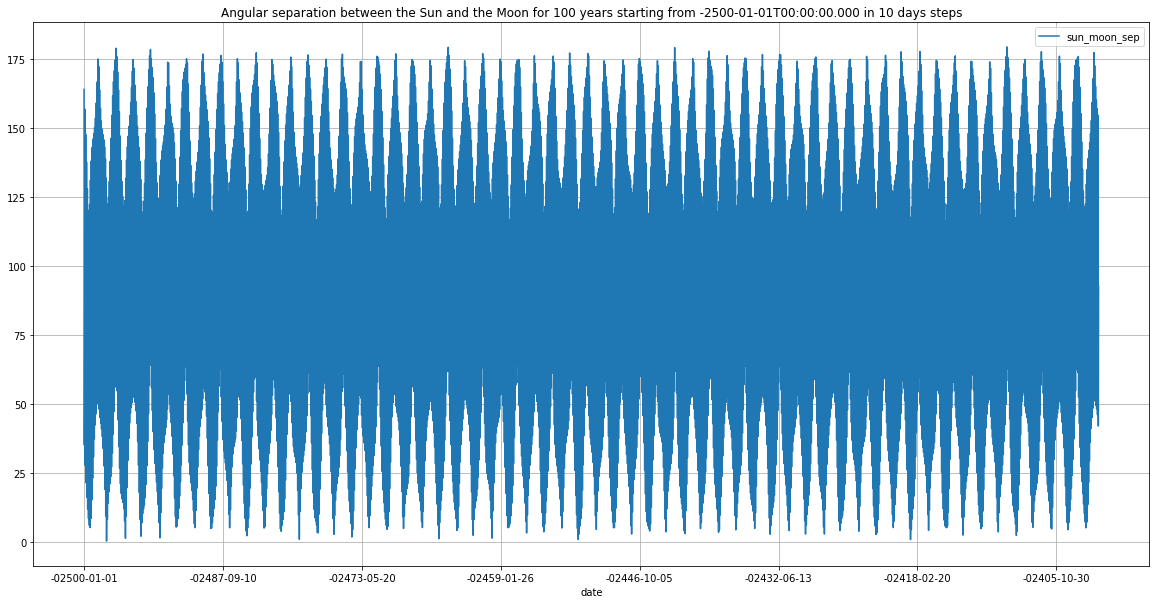

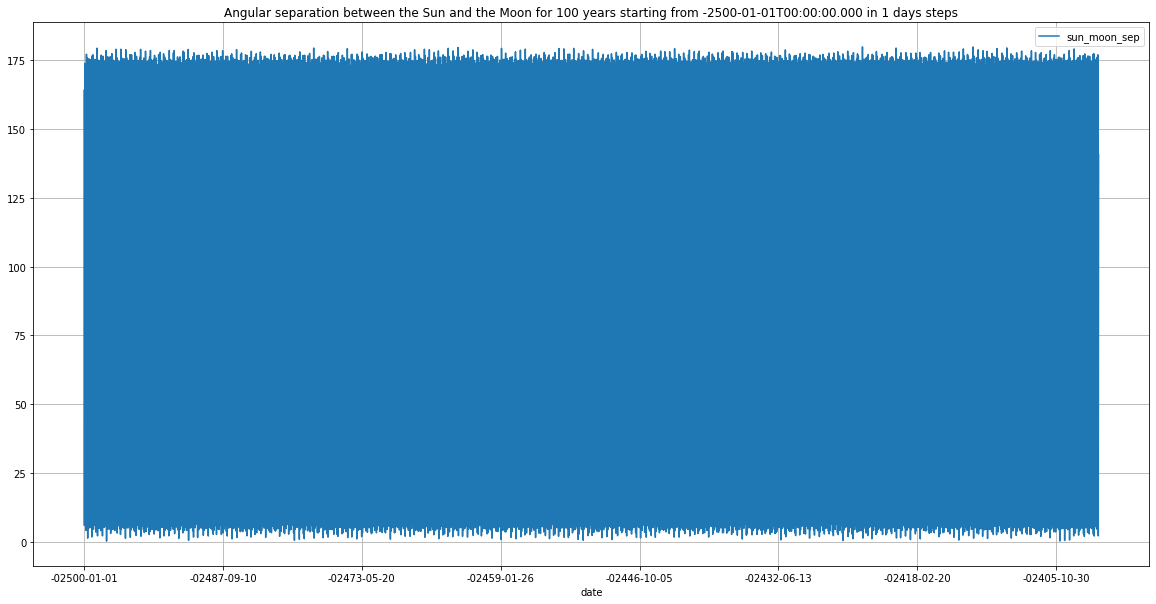

In [104]:
def plot_sun_moon_angular_sep(
        start_date = Time('-02500-01-01', scale='utc')
        , N_YEARS=100
        , STEPS_OF_N_DAYS=100
        ):
    df = calculate_sun_moon_angular_sep(start_date, N_YEARS, STEPS_OF_N_DAYS).assign (
        date = lambda x: x.time.apply(lambda t: re.sub(r'T.*', '', t))
    )
    display(df.head().style.set_caption(f'Snip of Angular separation between the Sun and the Moon for {N_YEARS} years starting from {start_date.isot} in {STEPS_OF_N_DAYS} days steps'))
    df.plot(x='date', y='sun_moon_sep', figsize=(20,10), grid=True, title=f'Angular separation between the Sun and the Moon for {N_YEARS} years starting from {start_date.isot} in {STEPS_OF_N_DAYS} days steps')
    

for n in [ 100, 10, 1] :
    plot_sun_moon_angular_sep(STEPS_OF_N_DAYS=n)

